### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# Verificando quais as colunas existe em cada arquivo csv

print (loja.columns)


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [4]:
# Padronizar os nomes das colunas (opcional, mas ajuda a evitar erros)

loja.columns = loja.columns.str.lower().str.strip()
loja2.columns = loja2.columns.str.lower().str.strip()
loja3.columns = loja3.columns.str.lower().str.strip()
loja4.columns = loja4.columns.str.lower().str.strip()


In [5]:
#import pandas as pd

# Criando um dicionário de DataFrames das lojas
lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

# Calculando faturamento de cada loja
faturamento_lojas = {nome: df["preço"].sum() for nome, df in lojas.items()}

# Calculando faturamento total
faturamento_total = sum(faturamento_lojas.values())

# Exibindo faturamento por loja
for nome, faturamento in faturamento_lojas.items():
    print(f"O faturamento da {nome} foi de R$ {faturamento}")

# Exibindo faturamento total
print(f"\nO faturamento total foi de R$ {faturamento_total}")


O faturamento da Loja 1 foi de R$ 1534509.12
O faturamento da Loja 2 foi de R$ 1488459.06
O faturamento da Loja 3 foi de R$ 1464025.03
O faturamento da Loja 4 foi de R$ 1384497.58

O faturamento total foi de R$ 5871490.79


ANOTAÇÕES SOBRE O CÓDIGO:

Pq usar um dicionário neste código?
Para associar o nome da loja aos seus dados.

Se você só usasse uma lista como [loja, loja2, loja3, loja4], você perderia os nomes das lojas — ficaria difícil saber qual DataFrame é de qual loja.

Com o dicionário, você faz isso:

"Loja 1" → loja (DataFrame)
"Loja 2" → loja2 (DataFrame)

Ou seja: guarda os dados e o nome das lojas juntos.

________________________________________________________

Facilita o loop com nome e dados ao mesmo tempo
Esse trecho:

for nome, df in lojas.items():

Permite que você acesse:

nome → o nome da loja ("Loja 1", "Loja 2", etc.)

df → os dados da loja (o DataFrame)

________________________________________________________
Assim pode calcular:

faturamento = df["preço"].sum()

e já sabe de qual loja é esse faturamento.

_________________________________________________________

Permite criar facilmente um novo dicionário com os resultados

faturamento_lojas = {nome: df["preço"].sum() for nome, df in lojas.items()}

Isso cria outro dicionário como:


{
    "Loja 1": 15300,
    "Loja 2": 28700,
    ...
}

Agora temos o nome da loja → faturamento, tudo bem organizado e fácil de usar depois.

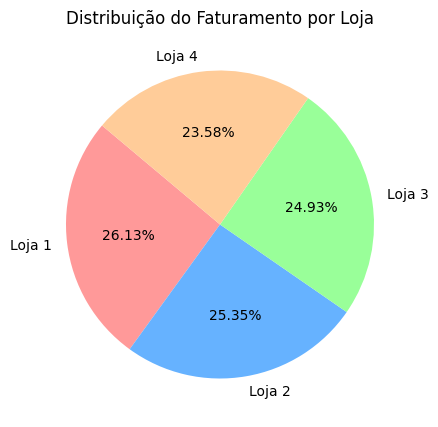

In [6]:
import matplotlib.pyplot as plt

# Dicionário contendo os valores de faturamento
faturamento_lojas = {
    "Loja 1": 1534509.12,
    "Loja 2": 1488459.06,
    "Loja 3": 1464025.03,
    "Loja 4": 1384497.58
}

# Extraindo os nomes e valores corretamente
nomes_lojas = list(faturamento_lojas.keys())
valores_faturamento = list(faturamento_lojas.values())

# Criando o gráfico de pizza colorido
cores = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]  # Paleta de cores para cada loja
plt.figure(figsize=(5, 5))
plt.pie(valores_faturamento, labels=nomes_lojas, autopct="%1.2f%%", startangle=140, colors=cores)

# Adicionando título
plt.title("Distribuição do Faturamento por Loja")

# Exibir o gráfico
plt.show()


# 2. Vendas por Categoria


In [7]:
import pandas as pd

# Função para calcular e mostrar as vendas por categoria de uma loja
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('categoria do produto')['preço'].sum()
    print(f"\nVendas por categoria na loja {numero}:\n")
    print(vendas)

# Mostrar resultados para cada loja
vendas_por_categoria(loja, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)



Vendas por categoria na loja 1:

categoria do produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: preço, dtype: float64

Vendas por categoria na loja 2:

categoria do produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: preço, dtype: float64

Vendas por categoria na loja 3:

categoria do produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis   

# 3. Média de Avaliação das Lojas

In [8]:
# Função para calcular a média da avaliação
def avaliacao_media(df, nome_loja):
    media = df["avaliação da compra"].mean()  # Calcula a média das avaliações
    print(f"{nome_loja} - Avaliação média: {media:.2f}")  # Imprime com 2 casas decimais

# Lista das lojas com nomes
lojas = [
    (loja, "Loja 1"),
    (loja2, "Loja 2"),
    (loja3, "Loja 3"),
    (loja4, "Loja 4"),
]

# Loop para mostrar avaliação média de cada loja
for df, nome in lojas:
    avaliacao_media(df, nome)


Loja 1 - Avaliação média: 3.98
Loja 2 - Avaliação média: 4.04
Loja 3 - Avaliação média: 4.05
Loja 4 - Avaliação média: 4.00


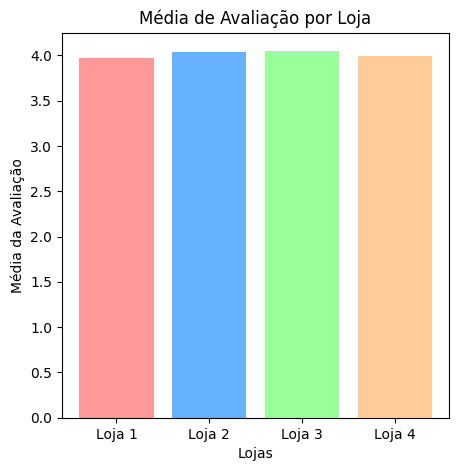

In [9]:
import matplotlib.pyplot as plt

# Dicionário para armazenar as médias das avaliações
avaliacoes_lojas = {
    "Loja 1": loja["avaliação da compra"].mean(),
    "Loja 2": loja2["avaliação da compra"].mean(),
    "Loja 3": loja3["avaliação da compra"].mean(),
    "Loja 4": loja4["avaliação da compra"].mean()
}

# Extraindo nomes das lojas e médias de avaliação
nomes_lojas = list(avaliacoes_lojas.keys())
medias_avaliacao = list(avaliacoes_lojas.values())

# Criando o gráfico de barras coloridas
cores = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]  # Paleta de cores personalizada
plt.figure(figsize=(5, 5))
plt.bar(nomes_lojas, medias_avaliacao, color=cores)

# Adicionando título e rótulos
plt.title("Média de Avaliação por Loja")
plt.xlabel("Lojas")
plt.ylabel("Média da Avaliação")

# Exibir o gráfico
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [13]:
import pandas as pd

# URLs dos arquivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat([pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)], ignore_index=True)

# Garantir tipos corretos
df_total["Quantidade"] = df_total["Quantidade de parcelas"].astype(int)

# Agrupar por Loja e Produto somando a quantidade vendida
vendas = df_total.groupby(["Loja", "Produto"])["Quantidade"].sum().reset_index()

# Exibir os 3 produtos mais e menos vendidos por loja
for loja in df_total["Loja"].unique():
    dados = vendas[vendas["Loja"] == loja]

    print(f"\n{loja} - TOP 3 produtos MAIS vendidos:")
    print(dados.nlargest(3, "Quantidade"))

    print(f"\n{loja} - TOP 3 produtos MENOS vendidos:")
    print(dados.nsmallest(3, "Quantidade"))
    print("*******************************")


Loja 1 - TOP 3 produtos MAIS vendidos:
      Loja             Produto  Quantidade
43  Loja 1  Secadora de roupas         214
47  Loja 1       TV Led UHD 4K         196
17  Loja 1              Cômoda         188

Loja 1 - TOP 3 produtos MENOS vendidos:
      Loja         Produto  Quantidade
11  Loja 1    Celular ABXY          78
38  Loja 1         Mochila          90
19  Loja 1  Dinossauro Rex          94
*******************************

Loja 2 - TOP 3 produtos MAIS vendidos:
       Loja                   Produto  Quantidade
79   Loja 2  Iniciando em programação         223
63   Loja 2          Celular Plus X42         195
100  Loja 2                    Violão         183

Loja 2 - TOP 3 produtos MENOS vendidos:
      Loja         Produto  Quantidade
87  Loja 2  Mesa de jantar          89
53  Loja 2       Bicicleta          98
80  Loja 2   Jogo de copos          98
*******************************

Loja 3 - TOP 3 produtos MAIS vendidos:
       Loja            Produto  Quantidade
104  Lo

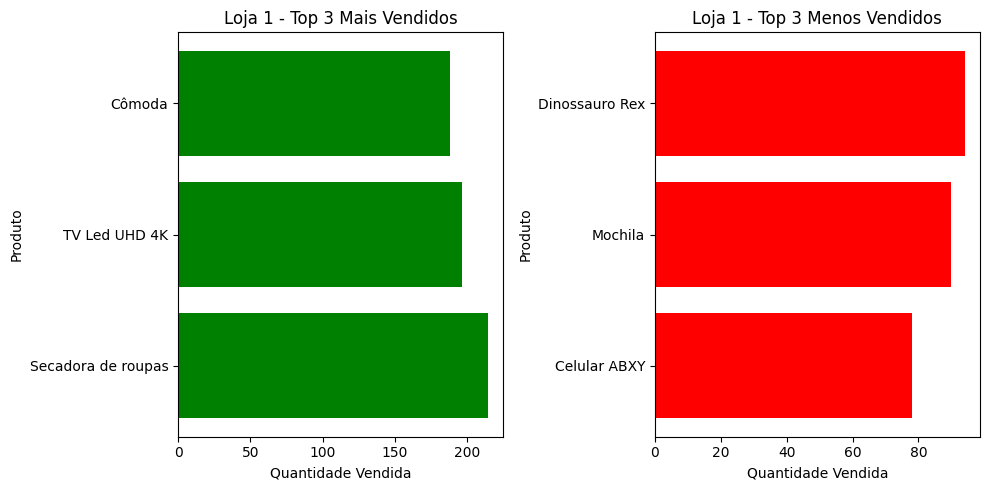

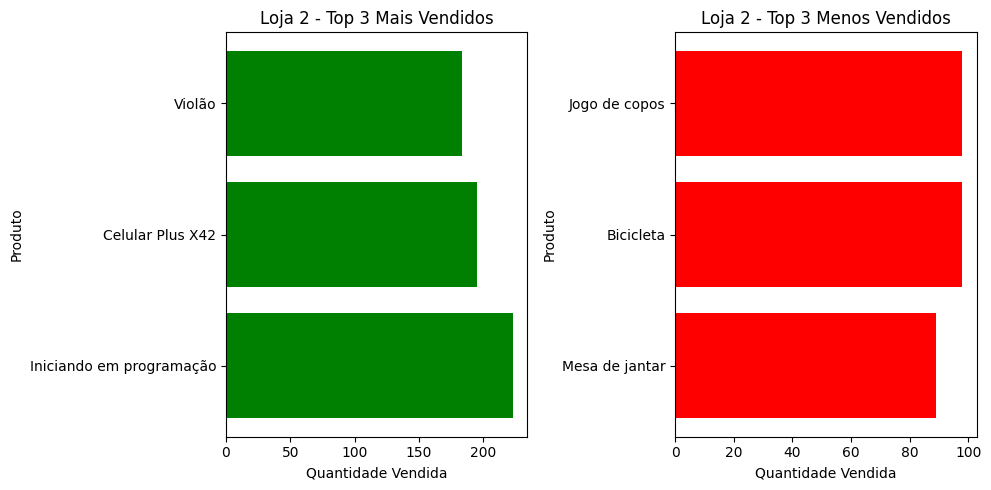

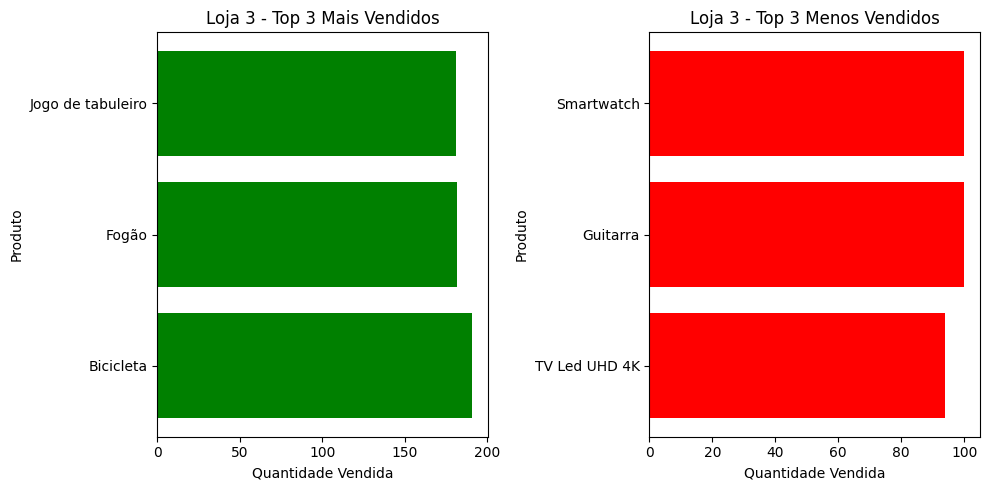

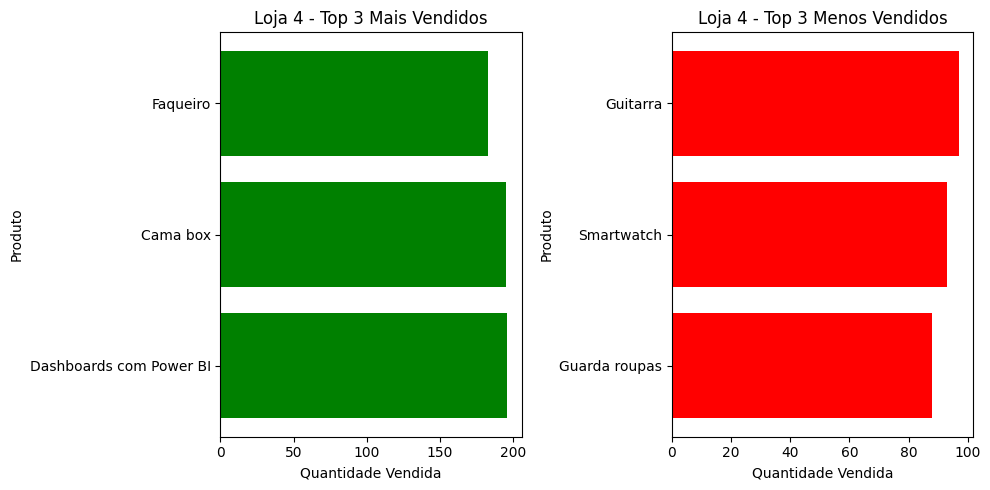

In [14]:
import matplotlib.pyplot as plt

# Criar gráficos para cada loja
for loja in df_total["Loja"].unique():
    dados = vendas[vendas["Loja"] == loja]

    top_3_mais_vendidos = dados.nlargest(3, "Quantidade")
    top_3_menos_vendidos = dados.nsmallest(3, "Quantidade")

    plt.figure(figsize=(10, 5))

    # Gráfico dos mais vendidos
    plt.subplot(1, 2, 1)
    plt.barh(top_3_mais_vendidos["Produto"], top_3_mais_vendidos["Quantidade"], color="green")
    plt.xlabel("Quantidade Vendida")
    plt.ylabel("Produto")
    plt.title(f"{loja} - Top 3 Mais Vendidos")

    # Gráfico dos menos vendidos
    plt.subplot(1, 2, 2)
    plt.barh(top_3_menos_vendidos["Produto"], top_3_menos_vendidos["Quantidade"], color="red")
    plt.xlabel("Quantidade Vendida")
    plt.ylabel("Produto")
    plt.title(f"{loja} - Top 3 Menos Vendidos")

    plt.tight_layout()
    plt.show()


# 5. Frete Médio por Loja


In [10]:
import pandas as pd

# URLs dos arquivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat([pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)], ignore_index=True)

# Garantir que a coluna de frete seja numérica
df_total["Frete"] = df_total["Frete"].astype(float)

# Calcular frete médio por loja
frete_medio_lojas = df_total.groupby("Loja")["Frete"].mean().reset_index()

# Exibir os resultados
print(frete_medio_lojas)


     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


# Relatório

Relatório de Análise de Desempenho das Lojas

Prezado Sr. João,

Com base nas métricas analisadas e na avaliação do desempenho das quatro lojas, apresento abaixo alguns pontos relevantes para a tomada de decisão:

Loja 1: Apresenta o maior faturamento e melhor desempenho em vendas, entretanto, possui a menor média de avaliação dos clientes, o que pode indicar desafios relacionados à qualidade do atendimento ou satisfação do consumidor.

Lojas 2 e 3: Estão praticamente equiparadas em todas as métricas analisadas, demonstrando estabilidade em desempenho e competitividade.

Loja 4: Apesar de ter registrado o menor faturamento, obteve a melhor média de avaliação dos clientes. No entanto, a diferença em relação às demais lojas não é significativa.

Loja 4: Um aspecto relevante a considerar é que seu produto mais vendido possui um ticket médio baixo, o que pode impactar a lucratividade geral. Esse fator pode estar relacionado à localização da loja e ao perfil dos consumidores da região.

Adicionalmente, no que diz respeito ao custo médio do frete, não foi possível determinar com precisão se esse custo é absorvido pela empresa ou pelo cliente. Para uma análise mais completa, seria essencial esclarecer essa informação, pois ela pode impactar diretamente a lucratividade e competitividade da operação.

Conclusão
Diante do contexto apresentado, sugere-se que a venda da Loja 4 seja considerada como estratégia para otimização do negócio e realocação dos investimentos conforme seus objetivos futuros. Caso haja necessidade de uma reavaliação baseada na distribuição do custo do frete, estaremos à disposição para refazer a análise.

Atenciosamente, Elise M. Carlson